# Solar Orbiter
This example demonstrates a ballistic model inspired by the solar orbiter mission.

In [1]:
# Pykep imports
from pykep.trajopt import mga_1dsm, launchers
from pykep.planet import jpl_lp
from pykep import epoch
from pykep.core import lambert_problem, propagate_lagrangian, fb_prop
from pykep import DAY2SEC, DAY2YEAR, AU, RAD2DEG, ic2par
from pykep.trajopt.gym._solar_orbiter import _solar_orbiter_udp

# Other imports
import numpy as np
from numpy.linalg import norm
from numpy import sign
from math import acos, asin, cos, exp, log, pi, sin
import matplotlib.pyplot as plt
from copy import deepcopy
import pygmo
import time

In [2]:
#%matplotlib notebook

In [3]:
# define search window
tmin = epoch(time.time() / (24*3600) - 30*365 -7 + 2/24 - 2*365)
tmax = epoch(time.time() / (24*3600) - 30*365 -7 + 2/24 + 2*365)

In [4]:
solar_orbiter = _solar_orbiter_udp([tmin, tmax])

In [5]:
# Include delta v, mass and sun distance constraints
prob = pygmo.unconstrain(pygmo.problem(solar_orbiter),method="weighted",weights=[1.0, 10.0, 100, 100])

In [6]:
# define problem and algorithm
pop = pygmo.population(prob=prob, size=50)
alg = pygmo.algorithm(pygmo.sade(memory=True,gen=1))

In [7]:
# run evolution
for i in range(3000):
    pop = alg.evolve(pop)
    print(i, pop.champion_f, solar_orbiter.fitness(pop.champion_x))

0 [23766.72614915] [1.5238300650672525, 23765.202319080585, array([-986.64875655]), -0.44508025468520973, -0.19999999999999996]
1 [23766.72614915] [1.5238300650672525, 23765.202319080585, array([-986.64875655]), -0.44508025468520973, -0.19999999999999996]
2 [8159.15543935] [1.5453056656260593, 6076.469888856752, array([208.08987956]), 0.0024144922135047597, -0.19999999999999996]
3 [8159.15543935] [1.5453056656260593, 6076.469888856752, array([208.08987956]), 0.0024144922135047597, -0.19999999999999996]
4 [8159.15543935] [1.5453056656260593, 6076.469888856752, array([208.08987956]), 0.0024144922135047597, -0.19999999999999996]
5 [8159.15543935] [1.5453056656260593, 6076.469888856752, array([208.08987956]), 0.0024144922135047597, -0.19999999999999996]
6 [8158.91152042] [1.5428359560678453, 6076.469888856752, array([208.08987956]), -0.004345071499640141, -0.19999999999999996]
7 [8158.91152042] [1.5428359560678453, 6076.469888856752, array([208.08987956]), -0.004345071499640141, -0.1999999

65 [3966.03039998] [1.4770353901718105, 3964.553364584952, array([-2010.26827244]), -0.16934839220415032, -0.16634135496627356]
66 [3966.03039998] [1.4770353901718105, 3964.553364584952, array([-2010.26827244]), -0.16934839220415032, -0.16634135496627356]
67 [3966.03039998] [1.4770353901718105, 3964.553364584952, array([-2010.26827244]), -0.16934839220415032, -0.16634135496627356]
68 [3966.03039998] [1.4770353901718105, 3964.553364584952, array([-2010.26827244]), -0.16934839220415032, -0.16634135496627356]
69 [3966.03039998] [1.4770353901718105, 3964.553364584952, array([-2010.26827244]), -0.16934839220415032, -0.16634135496627356]
70 [1558.69877261] [1.4893712314238325, 1557.2094013798733, array([-1483.44463835]), -0.163415651616875, -0.16370143303769025]
71 [1558.69877261] [1.4893712314238325, 1557.2094013798733, array([-1483.44463835]), -0.163415651616875, -0.16370143303769025]
72 [1558.69877261] [1.4893712314238325, 1557.2094013798733, array([-1483.44463835]), -0.163415651616875, -

135 [1482.8024051] [1.3937668563181203, 1481.4086382421392, array([-1483.44463835]), -0.159173249789401, -0.16370143303769025]
136 [1482.8024051] [1.3937668563181203, 1481.4086382421392, array([-1483.44463835]), -0.159173249789401, -0.16370143303769025]
137 [1482.8024051] [1.3937668563181203, 1481.4086382421392, array([-1483.44463835]), -0.159173249789401, -0.16370143303769025]
138 [1482.8024051] [1.3937668563181203, 1481.4086382421392, array([-1483.44463835]), -0.159173249789401, -0.16370143303769025]
139 [1482.8024051] [1.3937668563181203, 1481.4086382421392, array([-1483.44463835]), -0.159173249789401, -0.16370143303769025]
140 [1482.8024051] [1.3937668563181203, 1481.4086382421392, array([-1483.44463835]), -0.159173249789401, -0.16370143303769025]
141 [1482.8024051] [1.3937668563181203, 1481.4086382421392, array([-1483.44463835]), -0.159173249789401, -0.16370143303769025]
142 [1482.8024051] [1.3937668563181203, 1481.4086382421392, array([-1483.44463835]), -0.159173249789401, -0.163

203 [1478.30726394] [1.37063165757034, 1476.9366322787657, array([-1692.93135091]), -0.21535633335133936, -0.19999999999999996]
204 [1387.26618711] [1.3890823062354773, 1385.8771048013389, array([-1692.93135091]), -0.22712573823192284, -0.19999999999999996]
205 [1387.26618711] [1.3890823062354773, 1385.8771048013389, array([-1692.93135091]), -0.22712573823192284, -0.19999999999999996]
206 [1387.26618711] [1.3890823062354773, 1385.8771048013389, array([-1692.93135091]), -0.22712573823192284, -0.19999999999999996]
207 [1387.26618711] [1.3890823062354773, 1385.8771048013389, array([-1692.93135091]), -0.22712573823192284, -0.19999999999999996]
208 [1387.26618711] [1.3890823062354773, 1385.8771048013389, array([-1692.93135091]), -0.22712573823192284, -0.19999999999999996]
209 [1387.26618711] [1.3890823062354773, 1385.8771048013389, array([-1692.93135091]), -0.22712573823192284, -0.19999999999999996]
210 [1387.26618711] [1.3890823062354773, 1385.8771048013389, array([-1692.93135091]), -0.227

267 [1381.40725349] [1.3981695217049452, 1380.0090839643763, array([-1692.93135091]), -0.27005362601483274, -0.19999999999999996]
268 [1381.40121602] [1.392132052455519, 1380.0090839643763, array([-1692.93135091]), -0.2730440455015182, -0.19999999999999996]
269 [1381.40121602] [1.392132052455519, 1380.0090839643763, array([-1692.93135091]), -0.2730440455015182, -0.19999999999999996]
270 [1381.40121602] [1.392132052455519, 1380.0090839643763, array([-1692.93135091]), -0.2730440455015182, -0.19999999999999996]
271 [1381.40121602] [1.392132052455519, 1380.0090839643763, array([-1692.93135091]), -0.2730440455015182, -0.19999999999999996]
272 [1381.40121602] [1.392132052455519, 1380.0090839643763, array([-1692.93135091]), -0.2730440455015182, -0.19999999999999996]
273 [1381.40121602] [1.392132052455519, 1380.0090839643763, array([-1692.93135091]), -0.2730440455015182, -0.19999999999999996]
274 [1381.40121602] [1.392132052455519, 1380.0090839643763, array([-1692.93135091]), -0.27304404550151

330 [1381.40121602] [1.392132052455519, 1380.0090839643763, array([-1692.93135091]), -0.2730440455015182, -0.19999999999999996]
331 [1381.40121602] [1.392132052455519, 1380.0090839643763, array([-1692.93135091]), -0.2730440455015182, -0.19999999999999996]
332 [1381.40121602] [1.392132052455519, 1380.0090839643763, array([-1692.93135091]), -0.2730440455015182, -0.19999999999999996]
333 [1381.40121602] [1.392132052455519, 1380.0090839643763, array([-1692.93135091]), -0.2730440455015182, -0.19999999999999996]
334 [1381.40121602] [1.392132052455519, 1380.0090839643763, array([-1692.93135091]), -0.2730440455015182, -0.19999999999999996]
335 [1193.15556263] [1.5153630632782404, 1191.6401995650267, array([-1692.93135091]), -0.04023213326011671, -0.19999999999999996]
336 [1193.15556263] [1.5153630632782404, 1191.6401995650267, array([-1692.93135091]), -0.04023213326011671, -0.19999999999999996]
337 [1176.69677804] [1.4010420892304771, 1175.295735953955, array([-1692.93135091]), -0.161594586231

394 [1176.69677804] [1.4010420892304771, 1175.295735953955, array([-1692.93135091]), -0.16159458623157508, -0.19999999999999996]
395 [1176.69677804] [1.4010420892304771, 1175.295735953955, array([-1692.93135091]), -0.16159458623157508, -0.19999999999999996]
396 [1176.69677804] [1.4010420892304771, 1175.295735953955, array([-1692.93135091]), -0.16159458623157508, -0.19999999999999996]
397 [1176.69677804] [1.4010420892304771, 1175.295735953955, array([-1692.93135091]), -0.16159458623157508, -0.19999999999999996]
398 [1176.69677804] [1.4010420892304771, 1175.295735953955, array([-1692.93135091]), -0.16159458623157508, -0.19999999999999996]
399 [1176.69677804] [1.4010420892304771, 1175.295735953955, array([-1692.93135091]), -0.16159458623157508, -0.19999999999999996]
400 [1176.69677804] [1.4010420892304771, 1175.295735953955, array([-1692.93135091]), -0.16159458623157508, -0.19999999999999996]
401 [1176.69677804] [1.4010420892304771, 1175.295735953955, array([-1692.93135091]), -0.161594586

458 [797.82848663] [1.3893909632326178, 796.4390956699144, array([-1380.67019987]), -0.2115126521461505, -0.1912622738532943]
459 [797.82848663] [1.3893909632326178, 796.4390956699144, array([-1380.67019987]), -0.2115126521461505, -0.1912622738532943]
460 [797.82848663] [1.3893909632326178, 796.4390956699144, array([-1380.67019987]), -0.2115126521461505, -0.1912622738532943]
461 [797.82848663] [1.3893909632326178, 796.4390956699144, array([-1380.67019987]), -0.2115126521461505, -0.1912622738532943]
462 [797.82848663] [1.3893909632326178, 796.4390956699144, array([-1380.67019987]), -0.2115126521461505, -0.1912622738532943]
463 [797.82848663] [1.3893909632326178, 796.4390956699144, array([-1380.67019987]), -0.2115126521461505, -0.1912622738532943]
464 [797.82848663] [1.3893909632326178, 796.4390956699144, array([-1380.67019987]), -0.2115126521461505, -0.1912622738532943]
465 [797.82848663] [1.3893909632326178, 796.4390956699144, array([-1380.67019987]), -0.2115126521461505, -0.1912622738

525 [797.82713415] [1.3880384752522033, 796.4390956699144, array([-1380.67019987]), -0.1782539228304213, -0.1912622738532943]
526 [797.82713415] [1.3880384752522033, 796.4390956699144, array([-1380.67019987]), -0.1782539228304213, -0.1912622738532943]
527 [797.82713415] [1.3880384752522033, 796.4390956699144, array([-1380.67019987]), -0.1782539228304213, -0.1912622738532943]
528 [797.82713415] [1.3880384752522033, 796.4390956699144, array([-1380.67019987]), -0.1782539228304213, -0.1912622738532943]
529 [797.82713415] [1.3880384752522033, 796.4390956699144, array([-1380.67019987]), -0.1782539228304213, -0.1912622738532943]
530 [797.82713415] [1.3880384752522033, 796.4390956699144, array([-1380.67019987]), -0.1782539228304213, -0.1912622738532943]
531 [797.82713415] [1.3880384752522033, 796.4390956699144, array([-1380.67019987]), -0.1782539228304213, -0.1912622738532943]
532 [797.82713415] [1.3880384752522033, 796.4390956699144, array([-1380.67019987]), -0.1782539228304213, -0.1912622738

591 [796.45122864] [1.464110494813763, 794.9871181477081, array([-1245.63613368]), -0.33432534730360863, -0.19999999999999996]
592 [796.45122864] [1.464110494813763, 794.9871181477081, array([-1245.63613368]), -0.33432534730360863, -0.19999999999999996]
593 [796.45122864] [1.464110494813763, 794.9871181477081, array([-1245.63613368]), -0.33432534730360863, -0.19999999999999996]
594 [796.45122864] [1.464110494813763, 794.9871181477081, array([-1245.63613368]), -0.33432534730360863, -0.19999999999999996]
595 [796.45122864] [1.464110494813763, 794.9871181477081, array([-1245.63613368]), -0.33432534730360863, -0.19999999999999996]
596 [796.45122864] [1.464110494813763, 794.9871181477081, array([-1245.63613368]), -0.33432534730360863, -0.19999999999999996]
597 [796.45122864] [1.464110494813763, 794.9871181477081, array([-1245.63613368]), -0.33432534730360863, -0.19999999999999996]
598 [796.45122864] [1.464110494813763, 794.9871181477081, array([-1245.63613368]), -0.33432534730360863, -0.199

659 [707.70732055] [1.3905466345177413, 706.316773915544, array([-1245.63613368]), -0.1767112641151154, -0.19999999999999996]
660 [707.70732055] [1.3905466345177413, 706.316773915544, array([-1245.63613368]), -0.1767112641151154, -0.19999999999999996]
661 [707.70732055] [1.3905466345177413, 706.316773915544, array([-1245.63613368]), -0.1767112641151154, -0.19999999999999996]
662 [707.70732055] [1.3905466345177413, 706.316773915544, array([-1245.63613368]), -0.1767112641151154, -0.19999999999999996]
663 [707.70732055] [1.3905466345177413, 706.316773915544, array([-1245.63613368]), -0.1767112641151154, -0.19999999999999996]
664 [707.70732055] [1.3905466345177413, 706.316773915544, array([-1245.63613368]), -0.1767112641151154, -0.19999999999999996]
665 [707.70732055] [1.3905466345177413, 706.316773915544, array([-1245.63613368]), -0.1767112641151154, -0.19999999999999996]
666 [707.70732055] [1.3905466345177413, 706.316773915544, array([-1245.63613368]), -0.1767112641151154, -0.19999999999

725 [417.13270129] [1.4006068704147308, 415.7320944178846, array([-1659.67647877]), -0.22857098722861446, -0.19999999999999996]
726 [417.13270129] [1.4006068704147308, 415.7320944178846, array([-1659.67647877]), -0.22857098722861446, -0.19999999999999996]
727 [408.59895656] [1.4035475440383176, 407.1954090179388, array([-1659.67647877]), -0.24562830484898523, -0.19999999999999996]
728 [408.59895656] [1.4035475440383176, 407.1954090179388, array([-1659.67647877]), -0.24562830484898523, -0.19999999999999996]
729 [408.59895656] [1.4035475440383176, 407.1954090179388, array([-1659.67647877]), -0.24562830484898523, -0.19999999999999996]
730 [408.59895656] [1.4035475440383176, 407.1954090179388, array([-1659.67647877]), -0.24562830484898523, -0.19999999999999996]
731 [408.59895656] [1.4035475440383176, 407.1954090179388, array([-1659.67647877]), -0.24562830484898523, -0.19999999999999996]
732 [408.59895656] [1.4035475440383176, 407.1954090179388, array([-1659.67647877]), -0.24562830484898523

790 [396.71529459] [1.3929848519081016, 395.32230973884, array([-1659.67647877]), -0.16446388874531553, -0.19999999999999996]
791 [396.71529459] [1.3929848519081016, 395.32230973884, array([-1659.67647877]), -0.16446388874531553, -0.19999999999999996]
792 [396.71529459] [1.3929848519081016, 395.32230973884, array([-1659.67647877]), -0.16446388874531553, -0.19999999999999996]
793 [396.71529459] [1.3929848519081016, 395.32230973884, array([-1659.67647877]), -0.16446388874531553, -0.19999999999999996]
794 [396.71529459] [1.3929848519081016, 395.32230973884, array([-1659.67647877]), -0.16446388874531553, -0.19999999999999996]
795 [396.71529459] [1.3929848519081016, 395.32230973884, array([-1659.67647877]), -0.16446388874531553, -0.19999999999999996]
796 [396.71529459] [1.3929848519081016, 395.32230973884, array([-1659.67647877]), -0.16446388874531553, -0.19999999999999996]
797 [396.71529459] [1.3929848519081016, 395.32230973884, array([-1659.67647877]), -0.16446388874531553, -0.19999999999

856 [396.70864778] [1.3863380449535103, 395.32230973884, array([-1659.67647877]), -0.21538309788967008, -0.19999999999999996]
857 [396.70864778] [1.3863380449535103, 395.32230973884, array([-1659.67647877]), -0.21538309788967008, -0.19999999999999996]
858 [396.70864778] [1.3863380449535103, 395.32230973884, array([-1659.67647877]), -0.21538309788967008, -0.19999999999999996]
859 [396.70864778] [1.3863380449535103, 395.32230973884, array([-1659.67647877]), -0.21538309788967008, -0.19999999999999996]
860 [396.70864778] [1.3863380449535103, 395.32230973884, array([-1659.67647877]), -0.21538309788967008, -0.19999999999999996]
861 [396.70864778] [1.3863380449535103, 395.32230973884, array([-1659.67647877]), -0.21538309788967008, -0.19999999999999996]
862 [396.70864778] [1.3863380449535103, 395.32230973884, array([-1659.67647877]), -0.21538309788967008, -0.19999999999999996]
863 [396.70864778] [1.3863380449535103, 395.32230973884, array([-1659.67647877]), -0.21538309788967008, -0.19999999999

926 [163.71055445] [1.404714993946599, 162.3058394602731, array([-1568.02575945]), -0.1981670219986848, -0.19999999999999996]
927 [163.71055445] [1.404714993946599, 162.3058394602731, array([-1568.02575945]), -0.1981670219986848, -0.19999999999999996]
928 [163.71055445] [1.404714993946599, 162.3058394602731, array([-1568.02575945]), -0.1981670219986848, -0.19999999999999996]
929 [163.71055445] [1.404714993946599, 162.3058394602731, array([-1568.02575945]), -0.1981670219986848, -0.19999999999999996]
930 [163.71055445] [1.404714993946599, 162.3058394602731, array([-1568.02575945]), -0.1981670219986848, -0.19999999999999996]
931 [163.71055445] [1.404714993946599, 162.3058394602731, array([-1568.02575945]), -0.1981670219986848, -0.19999999999999996]
932 [163.71055445] [1.404714993946599, 162.3058394602731, array([-1568.02575945]), -0.1981670219986848, -0.19999999999999996]
933 [163.71055445] [1.404714993946599, 162.3058394602731, array([-1568.02575945]), -0.1981670219986848, -0.19999999999

992 [146.17125335] [1.4336592173598686, 144.73759413126663, array([-1568.02575945]), -0.11954515117165004, -0.19999999999999996]
993 [146.17125335] [1.4336592173598686, 144.73759413126663, array([-1568.02575945]), -0.11954515117165004, -0.19999999999999996]
994 [146.17125335] [1.4336592173598686, 144.73759413126663, array([-1568.02575945]), -0.11954515117165004, -0.19999999999999996]
995 [146.17125335] [1.4336592173598686, 144.73759413126663, array([-1568.02575945]), -0.11954515117165004, -0.19999999999999996]
996 [146.17125335] [1.4336592173598686, 144.73759413126663, array([-1568.02575945]), -0.11954515117165004, -0.19999999999999996]
997 [146.17125335] [1.4336592173598686, 144.73759413126663, array([-1568.02575945]), -0.11954515117165004, -0.19999999999999996]
998 [146.17125335] [1.4336592173598686, 144.73759413126663, array([-1568.02575945]), -0.11954515117165004, -0.19999999999999996]
999 [146.17125335] [1.4336592173598686, 144.73759413126663, array([-1568.02575945]), -0.119545151

1061 [146.12511947] [1.3875253378710812, 144.73759413126663, array([-1568.02575945]), -0.2089739292087716, -0.19999999999999996]
1062 [146.12511947] [1.3875253378710812, 144.73759413126663, array([-1568.02575945]), -0.2089739292087716, -0.19999999999999996]
1063 [146.12511947] [1.3875253378710812, 144.73759413126663, array([-1568.02575945]), -0.2089739292087716, -0.19999999999999996]
1064 [146.12511947] [1.3875253378710812, 144.73759413126663, array([-1568.02575945]), -0.2089739292087716, -0.19999999999999996]
1065 [146.12511947] [1.3875253378710812, 144.73759413126663, array([-1568.02575945]), -0.2089739292087716, -0.19999999999999996]
1066 [146.12511947] [1.3875253378710812, 144.73759413126663, array([-1568.02575945]), -0.2089739292087716, -0.19999999999999996]
1067 [146.12511947] [1.3875253378710812, 144.73759413126663, array([-1568.02575945]), -0.2089739292087716, -0.19999999999999996]
1068 [146.12511947] [1.3875253378710812, 144.73759413126663, array([-1568.02575945]), -0.20897392

1126 [146.12511947] [1.3875253378710148, 144.73759413126663, array([-1568.02575945]), -0.20897392920878322, -0.19999999999999996]
1127 [146.12511947] [1.3875253378710148, 144.73759413126663, array([-1568.02575945]), -0.20897392920878322, -0.19999999999999996]
1128 [146.12511947] [1.3875253378710148, 144.73759413126663, array([-1568.02575945]), -0.20897392920878322, -0.19999999999999996]
1129 [146.12511947] [1.3875253378710148, 144.73759413126663, array([-1568.02575945]), -0.20897392920878322, -0.19999999999999996]
1130 [146.12511947] [1.3875253378710148, 144.73759413126663, array([-1568.02575945]), -0.20897392920878322, -0.19999999999999996]
1131 [146.12511947] [1.3875253378710148, 144.73759413126663, array([-1568.02575945]), -0.20897392920878322, -0.19999999999999996]
1132 [146.12511947] [1.3875253378710148, 144.73759413126663, array([-1568.02575945]), -0.20897392920878322, -0.19999999999999996]
1133 [146.12511947] [1.3875253378710148, 144.73759413126663, array([-1568.02575945]), -0.2

1192 [99.40707784] [1.3848419846648607, 98.02223585252796, array([-918.84723194]), -0.22726094512362993, -0.19999999999999996]
1193 [99.40707784] [1.3848419846648607, 98.02223585252796, array([-918.84723194]), -0.22726094512362993, -0.19999999999999996]
1194 [99.40707784] [1.3848419846648607, 98.02223585252796, array([-918.84723194]), -0.22726094512362993, -0.19999999999999996]
1195 [99.40707784] [1.3848419846648607, 98.02223585252796, array([-918.84723194]), -0.22726094512362993, -0.19999999999999996]
1196 [99.40707784] [1.3848419846648607, 98.02223585252796, array([-918.84723194]), -0.22726094512362993, -0.19999999999999996]
1197 [99.40707784] [1.3848419846648607, 98.02223585252796, array([-918.84723194]), -0.22726094512362993, -0.19999999999999996]
1198 [99.40707784] [1.3848419846648607, 98.02223585252796, array([-918.84723194]), -0.22726094512362993, -0.19999999999999996]
1199 [99.40707784] [1.3848419846648607, 98.02223585252796, array([-918.84723194]), -0.22726094512362993, -0.199

1262 [60.27958199] [1.5374001392589656, 58.74218185319205, array([-949.20070734]), -0.12135935450537366, -0.19999999999999996]
1263 [60.27958199] [1.5374001392589656, 58.74218185319205, array([-949.20070734]), -0.12135935450537366, -0.19999999999999996]
1264 [29.94658365] [1.5284011805497397, 28.41818246946241, array([-920.19396514]), -0.05081725066287912, -0.19999999999999996]
1265 [29.94658365] [1.5284011805497397, 28.41818246946241, array([-920.19396514]), -0.05081725066287912, -0.19999999999999996]
1266 [29.87213569] [1.4539532212035298, 28.41818246946241, array([-920.19396514]), -0.07989368190699969, -0.19999999999999996]
1267 [29.87213569] [1.4539532212035298, 28.41818246946241, array([-920.19396514]), -0.07989368190699969, -0.19999999999999996]
1268 [29.87213569] [1.4539532212035298, 28.41818246946241, array([-920.19396514]), -0.07989368190699969, -0.19999999999999996]
1269 [29.87213569] [1.4539532212035298, 28.41818246946241, array([-920.19396514]), -0.07989368190699969, -0.199

1328 [20.07215112] [1.564928058480809, 18.50722306634725, array([-941.38287402]), -0.04405231481905142, -0.19999999999999996]
1329 [20.07215112] [1.564928058480809, 18.50722306634725, array([-941.38287402]), -0.04405231481905142, -0.19999999999999996]
1330 [20.07215112] [1.564928058480809, 18.50722306634725, array([-941.38287402]), -0.04405231481905142, -0.19999999999999996]
1331 [20.0704377] [1.5632146309680317, 18.50722306634725, array([-941.38287402]), -0.23814399095181293, -0.19999999999999996]
1332 [20.0704377] [1.5632146309680317, 18.50722306634725, array([-941.38287402]), -0.23814399095181293, -0.19999999999999996]
1333 [20.0704377] [1.5632146309680317, 18.50722306634725, array([-941.38287402]), -0.23814399095181293, -0.19999999999999996]
1334 [20.0704377] [1.5632146309680317, 18.50722306634725, array([-941.38287402]), -0.23814399095181293, -0.19999999999999996]
1335 [20.0704377] [1.5632146309680317, 18.50722306634725, array([-941.38287402]), -0.23814399095181293, -0.19999999999

1396 [19.8957744] [1.3885513362813335, 18.50722306634725, array([-941.38287402]), -0.1841981661739598, -0.19999999999999996]
1397 [19.8957744] [1.3885513362813335, 18.50722306634725, array([-941.38287402]), -0.1841981661739598, -0.19999999999999996]
1398 [19.8957744] [1.3885513362813335, 18.50722306634725, array([-941.38287402]), -0.1841981661739598, -0.19999999999999996]
1399 [19.8957744] [1.3885513362813335, 18.50722306634725, array([-941.38287402]), -0.1841981661739598, -0.19999999999999996]
1400 [19.8957744] [1.3885513362813335, 18.50722306634725, array([-941.38287402]), -0.1841981661739598, -0.19999999999999996]
1401 [19.8957744] [1.3885513362813335, 18.50722306634725, array([-941.38287402]), -0.1841981661739598, -0.19999999999999996]
1402 [19.8957744] [1.3885513362813335, 18.50722306634725, array([-941.38287402]), -0.1841981661739598, -0.19999999999999996]
1403 [19.8957744] [1.3885513362813335, 18.50722306634725, array([-941.38287402]), -0.1841981661739598, -0.19999999999999996]


1464 [7.42679038] [1.3888489496409138, 6.03794143073992, array([-922.4385537]), -0.18505134772928117, -0.19999999999999996]
1465 [7.42679038] [1.3888489496409138, 6.03794143073992, array([-922.4385537]), -0.18505134772928117, -0.19999999999999996]
1466 [7.42679038] [1.3888489496409138, 6.03794143073992, array([-922.4385537]), -0.18505134772928117, -0.19999999999999996]
1467 [7.42679038] [1.3888489496409138, 6.03794143073992, array([-922.4385537]), -0.18505134772928117, -0.19999999999999996]
1468 [7.42679038] [1.3888489496409138, 6.03794143073992, array([-922.4385537]), -0.18505134772928117, -0.19999999999999996]
1469 [7.42679038] [1.3888489496409138, 6.03794143073992, array([-922.4385537]), -0.18505134772928117, -0.19999999999999996]
1470 [7.42679038] [1.3888489496409138, 6.03794143073992, array([-922.4385537]), -0.18505134772928117, -0.19999999999999996]
1471 [7.42679038] [1.3888489496409138, 6.03794143073992, array([-922.4385537]), -0.18505134772928117, -0.19999999999999996]
1472 [7.

1532 [1.55830973] [1.5583097349799542, -4.479969182470086, array([-928.68067872]), -0.20393759953786283, -0.19999999999999996]
1533 [1.55830973] [1.5583097349799542, -4.479969182470086, array([-928.68067872]), -0.20393759953786283, -0.19999999999999996]
1534 [1.55830973] [1.5583097349799542, -4.479969182470086, array([-928.68067872]), -0.20393759953786283, -0.19999999999999996]
1535 [1.55830973] [1.5583097349799542, -4.479969182470086, array([-928.68067872]), -0.20393759953786283, -0.19999999999999996]
1536 [1.55830973] [1.5583097349799542, -4.479969182470086, array([-928.68067872]), -0.20393759953786283, -0.19999999999999996]
1537 [1.55830973] [1.5583097349799542, -4.479969182470086, array([-928.68067872]), -0.20393759953786283, -0.19999999999999996]
1538 [1.55830973] [1.5583097349799542, -4.479969182470086, array([-928.68067872]), -0.20393759953786283, -0.19999999999999996]
1539 [1.55830973] [1.5583097349799542, -4.479969182470086, array([-928.68067872]), -0.20393759953786283, -0.199

1597 [1.38477659] [1.384776592578021, -4.479969182470086, array([-928.68067872]), -0.22785875686981016, -0.19999999999999996]
1598 [1.38477659] [1.384776592578021, -4.479969182470086, array([-928.68067872]), -0.22785875686981016, -0.19999999999999996]
1599 [1.38477659] [1.384776592578021, -4.479969182470086, array([-928.68067872]), -0.22785875686981016, -0.19999999999999996]
1600 [1.38477659] [1.384776592578021, -4.479969182470086, array([-928.68067872]), -0.22785875686981016, -0.19999999999999996]
1601 [1.38477659] [1.384776592578021, -4.479969182470086, array([-928.68067872]), -0.22785875686981016, -0.19999999999999996]
1602 [1.38477659] [1.384776592578021, -4.479969182470086, array([-928.68067872]), -0.22785875686981016, -0.19999999999999996]
1603 [1.38477659] [1.384776592578021, -4.479969182470086, array([-928.68067872]), -0.22785875686981016, -0.19999999999999996]
1604 [1.38477659] [1.384776592578021, -4.479969182470086, array([-928.68067872]), -0.22785875686981016, -0.19999999999

1664 [1.38471911] [1.3847191076204248, -0.9129820939742785, array([-921.47061346]), -0.23609137132682123, -0.19999999999999996]
1665 [1.38471911] [1.3847191076204248, -0.9129820939742785, array([-921.47061346]), -0.23609137132682123, -0.19999999999999996]
1666 [1.38471911] [1.3847191076204248, -0.9129820939742785, array([-921.47061346]), -0.23609137132682123, -0.19999999999999996]
1667 [1.38471911] [1.3847191076204248, -0.9129820939742785, array([-921.47061346]), -0.23609137132682123, -0.19999999999999996]
1668 [1.38471911] [1.3847191076204248, -0.9129820939742785, array([-921.47061346]), -0.23609137132682123, -0.19999999999999996]
1669 [1.38471911] [1.3847191076204248, -0.9129820939742785, array([-921.47061346]), -0.23609137132682123, -0.19999999999999996]
1670 [1.38471911] [1.3847191076204248, -0.9129820939742785, array([-921.47061346]), -0.23609137132682123, -0.19999999999999996]
1671 [1.38471911] [1.3847191076204248, -0.9129820939742785, array([-921.47061346]), -0.23609137132682123

1733 [1.38470149] [1.3847014888865379, -2.9883953451726484, array([-920.46955742]), -0.22710982679930758, -0.19999999999999996]
1734 [1.38470149] [1.3847014888865379, -2.9883953451726484, array([-920.46955742]), -0.22710982679930758, -0.19999999999999996]
1735 [1.38470149] [1.3847014888865379, -2.9883953451726484, array([-920.46955742]), -0.22710982679930758, -0.19999999999999996]
1736 [1.38470149] [1.3847014888865379, -2.9883953451726484, array([-920.46955742]), -0.22710982679930758, -0.19999999999999996]
1737 [1.38467805] [1.3846780508586278, -2.9811614174113856, array([-919.4886341]), -0.23007108847595847, -0.19999999999999996]
1738 [1.38467805] [1.3846780508586278, -2.9811614174113856, array([-919.4886341]), -0.23007108847595847, -0.19999999999999996]
1739 [1.38467805] [1.3846780508586278, -2.9811614174113856, array([-919.4886341]), -0.23007108847595847, -0.19999999999999996]
1740 [1.38467805] [1.3846780508586278, -2.9811614174113856, array([-919.4886341]), -0.23007108847595847, -0

1803 [1.38464037] [1.3846403712801856, -0.9083311836911889, array([-907.21217365]), -0.22993210639277972, -0.19999999999999996]
1804 [1.38464037] [1.3846403712801856, -0.9083311836911889, array([-907.21217365]), -0.22993210639277972, -0.19999999999999996]
1805 [1.38464037] [1.3846403712801856, -0.9083311836911889, array([-907.21217365]), -0.22993210639277972, -0.19999999999999996]
1806 [1.38464037] [1.3846403712801856, -0.9083311836911889, array([-907.21217365]), -0.22993210639277972, -0.19999999999999996]
1807 [1.38464037] [1.3846403712801856, -0.9083311836911889, array([-907.21217365]), -0.22993210639277972, -0.19999999999999996]
1808 [1.38464037] [1.3846403712801856, -0.9083311836911889, array([-907.21217365]), -0.22993210639277972, -0.19999999999999996]
1809 [1.38464037] [1.3846403712801856, -0.9083311836911889, array([-907.21217365]), -0.22993210639277972, -0.19999999999999996]
1810 [1.38464037] [1.3846403712801856, -0.9083311836911889, array([-907.21217365]), -0.22993210639277972

1874 [1.38455011] [1.3845501065276782, -1.2258009355273316, array([-895.87174852]), -0.23064859562816453, -0.19999999999999996]
1875 [1.38455011] [1.3845501065276782, -1.2258009355273316, array([-895.87174852]), -0.23064859562816453, -0.19999999999999996]
1876 [1.384549] [1.3845490012350927, -2.4757753700005196, array([-898.57151863]), -0.23107431651428723, -0.19999999999999996]
1877 [1.384549] [1.3845490012350927, -2.4757753700005196, array([-898.57151863]), -0.23107431651428723, -0.19999999999999996]
1878 [1.384549] [1.3845490012350927, -2.4757753700005196, array([-898.57151863]), -0.23107431651428723, -0.19999999999999996]
1879 [1.384549] [1.3845490012350927, -2.4757753700005196, array([-898.57151863]), -0.23107431651428723, -0.19999999999999996]
1880 [1.384549] [1.3845490012350927, -2.4757753700005196, array([-898.57151863]), -0.23107431651428723, -0.19999999999999996]
1881 [1.384549] [1.3845490012350927, -2.4757753700005196, array([-898.57151863]), -0.23107431651428723, -0.1999999

1941 [1.38447891] [1.3844789117334226, -0.3210143849164524, array([-876.98784846]), -0.2327383811729331, -0.19999999999999996]
1942 [1.38447891] [1.3844789117334226, -0.3210143849164524, array([-876.98784846]), -0.2327383811729331, -0.19999999999999996]
1943 [1.38447891] [1.3844789117334226, -0.3210143849164524, array([-876.98784846]), -0.2327383811729331, -0.19999999999999996]
1944 [1.38447891] [1.3844789117334226, -0.3210143849164524, array([-876.98784846]), -0.2327383811729331, -0.19999999999999996]
1945 [1.38447891] [1.3844789117334226, -0.3210143849164524, array([-876.98784846]), -0.2327383811729331, -0.19999999999999996]
1946 [1.38447891] [1.3844789117334226, -0.3210143849164524, array([-876.98784846]), -0.2327383811729331, -0.19999999999999996]
1947 [1.38447891] [1.3844789117334226, -0.3210143849164524, array([-876.98784846]), -0.2327383811729331, -0.19999999999999996]
1948 [1.38447891] [1.3844789117334226, -0.3210143849164524, array([-876.98784846]), -0.2327383811729331, -0.199

2007 [1.38447617] [1.3844761726667767, -0.9208779991549818, array([-875.18471993]), -0.23261843391492965, -0.19999999999999996]
2008 [1.38447617] [1.3844761726667767, -0.9208779991549818, array([-875.18471993]), -0.23261843391492965, -0.19999999999999996]
2009 [1.38447617] [1.3844761726667767, -0.9208779991549818, array([-875.18471993]), -0.23261843391492965, -0.19999999999999996]
2010 [1.38447617] [1.3844761726667767, -0.9208779991549818, array([-875.18471993]), -0.23261843391492965, -0.19999999999999996]
2011 [1.38447617] [1.3844761726667767, -0.9208779991549818, array([-875.18471993]), -0.23261843391492965, -0.19999999999999996]
2012 [1.38447617] [1.3844761726667767, -0.9208779991549818, array([-875.18471993]), -0.23261843391492965, -0.19999999999999996]
2013 [1.38447617] [1.3844761726667767, -0.9208779991549818, array([-875.18471993]), -0.23261843391492965, -0.19999999999999996]
2014 [1.38447617] [1.3844761726667767, -0.9208779991549818, array([-875.18471993]), -0.23261843391492965

2072 [1.38446509] [1.3844650860909082, -0.17055250771318242, array([-872.88505749]), -0.23246203197123205, -0.19999999999999996]
2073 [1.38446509] [1.3844650860909082, -0.17055250771318242, array([-872.88505749]), -0.23246203197123205, -0.19999999999999996]
2074 [1.38446509] [1.3844650860909082, -0.17055250771318242, array([-872.88505749]), -0.23246203197123205, -0.19999999999999996]
2075 [1.38446509] [1.3844650860909082, -0.17055250771318242, array([-872.88505749]), -0.23246203197123205, -0.19999999999999996]
2076 [1.38446509] [1.3844650860909082, -0.17055250771318242, array([-872.88505749]), -0.23246203197123205, -0.19999999999999996]
2077 [1.38446509] [1.3844650860909082, -0.17055250771318242, array([-872.88505749]), -0.23246203197123205, -0.19999999999999996]
2078 [1.38446509] [1.3844650860909082, -0.17055250771318242, array([-872.88505749]), -0.23246203197123205, -0.19999999999999996]
2079 [1.38446509] [1.3844650860909082, -0.17055250771318242, array([-872.88505749]), -0.232462031

2137 [1.38445926] [1.384459260429843, -0.606203771761102, array([-870.248065]), -0.23211099097870425, -0.19999999999999996]
2138 [1.38445926] [1.384459260429843, -0.606203771761102, array([-870.248065]), -0.23211099097870425, -0.19999999999999996]
2139 [1.38445926] [1.384459260429843, -0.606203771761102, array([-870.248065]), -0.23211099097870425, -0.19999999999999996]
2140 [1.38445926] [1.384459260429843, -0.606203771761102, array([-870.248065]), -0.23211099097870425, -0.19999999999999996]
2141 [1.38445851] [1.3844585079966727, -0.6831685994093277, array([-868.23385286]), -0.23313287955337725, -0.19999999999999996]
2142 [1.38445851] [1.3844585079966727, -0.6831685994093277, array([-868.23385286]), -0.23313287955337725, -0.19999999999999996]
2143 [1.38445801] [1.384458008189782, -3.9817062775027807, array([-867.31887876]), -0.2322205039259344, -0.19999999999999996]
2144 [1.38445581] [1.384455808176606, -3.345067700402069, array([-867.53500895]), -0.23287362747669438, -0.199999999999999

2204 [1.38444344] [1.384443443135218, -0.8987066023964871, array([-866.47763762]), -0.2325313367603663, -0.19999999999999996]
2205 [1.38444344] [1.384443443135218, -0.8987066023964871, array([-866.47763762]), -0.2325313367603663, -0.19999999999999996]
2206 [1.38444344] [1.384443443135218, -0.8987066023964871, array([-866.47763762]), -0.2325313367603663, -0.19999999999999996]
2207 [1.38444344] [1.384443443135218, -0.8987066023964871, array([-866.47763762]), -0.2325313367603663, -0.19999999999999996]
2208 [1.38444344] [1.384443443135218, -0.8987066023964871, array([-866.47763762]), -0.2325313367603663, -0.19999999999999996]
2209 [1.38444344] [1.384443443135218, -0.8987066023964871, array([-866.47763762]), -0.2325313367603663, -0.19999999999999996]
2210 [1.38444344] [1.384443443135218, -0.8987066023964871, array([-866.47763762]), -0.2325313367603663, -0.19999999999999996]
2211 [1.38444344] [1.384443443135218, -0.8987066023964871, array([-866.47763762]), -0.2325313367603663, -0.19999999999

2274 [1.3844393] [1.3844392958384049, -0.9270648349420298, array([-866.03990965]), -0.23257957293687004, -0.19999999999999996]
2275 [1.3844393] [1.3844392958384049, -0.9270648349420298, array([-866.03990965]), -0.23257957293687004, -0.19999999999999996]
2276 [1.3844393] [1.3844392958384049, -0.9270648349420298, array([-866.03990965]), -0.23257957293687004, -0.19999999999999996]
2277 [1.38443774] [1.384437744861539, -0.2286351859138449, array([-866.18376336]), -0.23230131748599625, -0.19999999999999996]
2278 [1.38443774] [1.384437744861539, -0.2286351859138449, array([-866.18376336]), -0.23230131748599625, -0.19999999999999996]
2279 [1.38443774] [1.384437744861539, -0.2286351859138449, array([-866.18376336]), -0.23230131748599625, -0.19999999999999996]
2280 [1.38443774] [1.384437744861539, -0.2286351859138449, array([-866.18376336]), -0.23230131748599625, -0.19999999999999996]
2281 [1.38443774] [1.384437744861539, -0.2286351859138449, array([-866.18376336]), -0.23230131748599625, -0.199

2340 [1.38443774] [1.384437744861539, -0.2286351859138449, array([-866.18376336]), -0.23230131748599625, -0.19999999999999996]
2341 [1.38443774] [1.384437744861539, -0.2286351859138449, array([-866.18376336]), -0.23230131748599625, -0.19999999999999996]
2342 [1.38443774] [1.384437744861539, -0.2286351859138449, array([-866.18376336]), -0.23230131748599625, -0.19999999999999996]
2343 [1.38443774] [1.384437744861539, -0.2286351859138449, array([-866.18376336]), -0.23230131748599625, -0.19999999999999996]
2344 [1.38443774] [1.384437744861539, -0.2286351859138449, array([-866.18376336]), -0.23230131748599625, -0.19999999999999996]
2345 [1.38443774] [1.384437744861539, -0.2286351859138449, array([-866.18376336]), -0.23230131748599625, -0.19999999999999996]
2346 [1.38443774] [1.384437744861539, -0.2286351859138449, array([-866.18376336]), -0.23230131748599625, -0.19999999999999996]
2347 [1.38443774] [1.384437744861539, -0.2286351859138449, array([-866.18376336]), -0.23230131748599625, -0.199

2405 [1.38443616] [1.3844361609452742, -0.18264601334249164, array([-866.03209685]), -0.2324068202768781, -0.19999999999999996]
2406 [1.38443616] [1.3844361609452742, -0.18264601334249164, array([-866.03209685]), -0.2324068202768781, -0.19999999999999996]
2407 [1.38443616] [1.3844361609452742, -0.18264601334249164, array([-866.03209685]), -0.2324068202768781, -0.19999999999999996]
2408 [1.38443616] [1.3844361609452742, -0.18264601334249164, array([-866.03209685]), -0.2324068202768781, -0.19999999999999996]
2409 [1.38443616] [1.3844361609452742, -0.18264601334249164, array([-866.03209685]), -0.2324068202768781, -0.19999999999999996]
2410 [1.38443616] [1.3844361609452742, -0.18264601334249164, array([-866.03209685]), -0.2324068202768781, -0.19999999999999996]
2411 [1.38443616] [1.3844361609452742, -0.18264601334249164, array([-866.03209685]), -0.2324068202768781, -0.19999999999999996]
2412 [1.38443616] [1.3844361609452742, -0.18264601334249164, array([-866.03209685]), -0.2324068202768781

2477 [1.38443473] [1.384434725746801, -0.599701344616733, array([-866.11704317]), -0.23206878516981588, -0.19999999999999996]
2478 [1.38443473] [1.384434725746801, -0.599701344616733, array([-866.11704317]), -0.23206878516981588, -0.19999999999999996]
2479 [1.38443473] [1.384434725746801, -0.599701344616733, array([-866.11704317]), -0.23206878516981588, -0.19999999999999996]
2480 [1.38443473] [1.384434725746801, -0.599701344616733, array([-866.11704317]), -0.23206878516981588, -0.19999999999999996]
2481 [1.38443473] [1.384434725746801, -0.599701344616733, array([-866.11704317]), -0.23206878516981588, -0.19999999999999996]
2482 [1.38443473] [1.384434725746801, -0.599701344616733, array([-866.11704317]), -0.23206878516981588, -0.19999999999999996]
2483 [1.3844347] [1.3844346971250567, -0.05003635263892647, array([-866.05913563]), -0.23224222455906363, -0.19999999999999996]
2484 [1.3844347] [1.3844346971250567, -0.05003635263892647, array([-866.05913563]), -0.23224222455906363, -0.1999999

2545 [1.38443315] [1.3844331538715777, -0.039379191738589725, array([-866.05650424]), -0.2319308661771543, -0.19999999999999996]
2546 [1.38443315] [1.3844331538715777, -0.039379191738589725, array([-866.05650424]), -0.2319308661771543, -0.19999999999999996]
2547 [1.38443315] [1.3844331538715777, -0.039379191738589725, array([-866.05650424]), -0.2319308661771543, -0.19999999999999996]
2548 [1.38443315] [1.3844331538715777, -0.039379191738589725, array([-866.05650424]), -0.2319308661771543, -0.19999999999999996]
2549 [1.38443315] [1.3844331538715777, -0.039379191738589725, array([-866.05650424]), -0.2319308661771543, -0.19999999999999996]
2550 [1.38443315] [1.3844331538715777, -0.039379191738589725, array([-866.05650424]), -0.2319308661771543, -0.19999999999999996]
2551 [1.38443315] [1.3844331538715777, -0.039379191738589725, array([-866.05650424]), -0.2319308661771543, -0.19999999999999996]
2552 [1.38443315] [1.3844331538715777, -0.039379191738589725, array([-866.05650424]), -0.23193086

2615 [1.38443289] [1.3844328870069162, -0.06255262308241072, array([-866.03751619]), -0.23199470446802162, -0.19999999999999996]
2616 [1.38443289] [1.3844328869825397, -0.06255262308241072, array([-866.03751619]), -0.2319976922921526, -0.19999999999999996]
2617 [1.38443286] [1.3844328608162133, -0.05032407696853625, array([-866.02740129]), -0.23198208007865218, -0.19999999999999996]
2618 [1.38443286] [1.3844328608162133, -0.05032407696853625, array([-866.02740129]), -0.23198208007865218, -0.19999999999999996]
2619 [1.38443286] [1.3844328608162133, -0.05032407696853625, array([-866.02740129]), -0.23198208007865218, -0.19999999999999996]
2620 [1.38443286] [1.3844328608162133, -0.05032407696853625, array([-866.02740129]), -0.23198208007865218, -0.19999999999999996]
2621 [1.38443286] [1.3844328608162133, -0.05032407696853625, array([-866.02740129]), -0.23198208007865218, -0.19999999999999996]
2622 [1.38443286] [1.3844328608162133, -0.05032407696853625, array([-866.02740129]), -0.2319820800

2683 [1.38443278] [1.384432783179395, -0.03751226141685038, array([-866.02740129]), -0.2319827775851998, -0.19999999999999996]
2684 [1.38443278] [1.384432783179395, -0.03751226141685038, array([-866.02740129]), -0.2319827775851998, -0.19999999999999996]
2685 [1.38443278] [1.384432783179395, -0.03751226141685038, array([-866.02740129]), -0.2319827775851998, -0.19999999999999996]
2686 [1.38443278] [1.384432783179395, -0.03751226141685038, array([-866.02740129]), -0.2319827775851998, -0.19999999999999996]
2687 [1.38443278] [1.384432783179395, -0.03751226141685038, array([-866.02740129]), -0.2319827775851998, -0.19999999999999996]
2688 [1.38443278] [1.384432783179395, -0.03751226141685038, array([-866.02740129]), -0.2319827775851998, -0.19999999999999996]
2689 [1.38443278] [1.384432783179395, -0.03751226141685038, array([-866.02740129]), -0.2319827775851998, -0.19999999999999996]
2690 [1.38443278] [1.384432783179395, -0.03751226141685038, array([-866.02740129]), -0.2319827775851998, -0.199

2748 [1.38443265] [1.3844326460515755, -0.00023990783029148588, array([-866.01044626]), -0.2319856932531167, -0.19999999999999996]
2749 [1.38443264] [1.3844326386338248, -0.007458285407665244, array([-866.01726948]), -0.23204004943350154, -0.19999999999999996]
2750 [1.38443264] [1.3844326386338248, -0.007458285407665244, array([-866.01726948]), -0.23204004943350154, -0.19999999999999996]
2751 [1.38443264] [1.3844326386338248, -0.007458285407665244, array([-866.01726948]), -0.23204004943350154, -0.19999999999999996]
2752 [1.38443263] [1.3844326303343732, -0.005273612899145519, array([-866.01414084]), -0.23203664000078505, -0.19999999999999996]
2753 [1.38443263] [1.3844326303343732, -0.005273612899145519, array([-866.01414084]), -0.23203664000078505, -0.19999999999999996]
2754 [1.38443263] [1.3844326303343732, -0.005273612899145519, array([-866.01414084]), -0.23203664000078505, -0.19999999999999996]
2755 [1.38443263] [1.3844326303343732, -0.005273612899145519, array([-866.01414084]), -0.

2815 [1.38443255] [1.3844325531612238, -0.0008741728752283962, array([-866.00052265]), -0.23207733286648324, -0.19999999999999996]
2816 [1.38443255] [1.3844325531612238, -0.0008741728752283962, array([-866.00052265]), -0.23207733286648324, -0.19999999999999996]
2817 [1.38443255] [1.3844325531612238, -0.0008741728752283962, array([-866.00052265]), -0.23207733286648324, -0.19999999999999996]
2818 [1.38443255] [1.3844325531612238, -0.0008741728752283962, array([-866.00052265]), -0.23207733286648324, -0.19999999999999996]
2819 [1.38443255] [1.3844325531612225, -0.0008741728752283962, array([-866.00052265]), -0.23207733286648324, -0.19999999999999996]
2820 [1.38443255] [1.3844325531612225, -0.0008741728752283962, array([-866.00052265]), -0.23207733286648324, -0.19999999999999996]
2821 [1.38443255] [1.3844325531612225, -0.0008741728752283962, array([-866.00052265]), -0.23207733286648324, -0.19999999999999996]
2822 [1.38443255] [1.3844325531612225, -0.0008741728752283962, array([-866.00052265

2882 [1.38443254] [1.3844325377530353, -0.0028972383561267634, array([-866.00128648]), -0.23208712624532446, -0.19999999999999996]
2883 [1.38443254] [1.3844325377530353, -0.0028972383561267634, array([-866.00128648]), -0.23208712624532446, -0.19999999999999996]
2884 [1.38443254] [1.3844325377530353, -0.0028972383561267634, array([-866.00128648]), -0.23208712624532446, -0.19999999999999996]
2885 [1.38443254] [1.3844325377530353, -0.0028972383561267634, array([-866.00128648]), -0.23208712624532446, -0.19999999999999996]
2886 [1.38443254] [1.3844325377530353, -0.0028972383561267634, array([-866.00128648]), -0.23208712624532446, -0.19999999999999996]
2887 [1.38443254] [1.3844325377530353, -0.0028972383561267634, array([-866.00128648]), -0.23208712624532446, -0.19999999999999996]
2888 [1.38443254] [1.3844325377530353, -0.0028972383561267634, array([-866.00128648]), -0.23208712624532446, -0.19999999999999996]
2889 [1.38443254] [1.3844325377530353, -0.0028972383561267634, array([-866.00128648

2945 [1.38443252] [1.384432520650249, -0.0016109561520352145, array([-866.00165838]), -0.23208226961593148, -0.19999999999999996]
2946 [1.38443252] [1.384432520650249, -0.0016109561520352145, array([-866.00165838]), -0.23208226961593148, -0.19999999999999996]
2947 [1.38443252] [1.384432520650249, -0.0016109561520352145, array([-866.00165838]), -0.23208226961593148, -0.19999999999999996]
2948 [1.38443252] [1.384432520650249, -0.0016109561520352145, array([-866.00165838]), -0.23208226961593148, -0.19999999999999996]
2949 [1.38443252] [1.384432520650249, -0.0016109561520352145, array([-866.00165838]), -0.23208226961593148, -0.19999999999999996]
2950 [1.38443252] [1.384432520650249, -0.0016109561520352145, array([-866.00165838]), -0.23208226961593148, -0.19999999999999996]
2951 [1.38443252] [1.384432520650249, -0.0016109561520352145, array([-866.00165838]), -0.23208226961593148, -0.19999999999999996]
2952 [1.38443252] [1.3844325205657488, -0.0038834776441944996, array([-866.00136857]), -0.

In [8]:
pop.champion_x

array([7.30457574e+03, 2.30297429e+02, 4.41861723e+02, 1.14336400e+02,
       1.51693611e+02, 1.45660418e-01, 1.05783212e+00])

In [9]:
solar_orbiter.fitness(pop.champion_x)

[1.3844325149186103,
 -0.0020999182861487498,
 array([-866.00170206]),
 -0.23211135530774363,
 -0.19999999999999996]

In [10]:
# start date
epoch(pop.champion_x[0])

2019-Dec-31 13:49:04.256201

In [11]:
# Inspect best result
solar_orbiter.pretty(pop.champion_x)

Multiple Gravity Assist (MGA) problem: 
Planet sequence:  ['earth', 'venus', 'venus', 'earth', 'venus']
Departure:  earth
	Epoch:  7304.575743706029  [mjd2000]
	Spacecraft velocity:  (-28087.514242576417, 602.5893372467281, 1477.250245967504) [m/s]
	Launch velocity:  [1793.9888509731027, 5531.721843376928, 1477.026197520349] [m/s]
Fly-by:  venus
	Epoch:  7534.873172580029  [mjd2000]
	DV:  0.0027494131627463503 [m/s]
Fly-by:  venus
	Epoch:  7976.7348952031225  [mjd2000]
	DV:  0.005644182289870514 [m/s]
Fly-by:  earth
	Epoch:  8091.071294894743  [mjd2000]
	DV:  9.989506486261234 [m/s]
Final Fly-by:  venus
	Epoch:  8242.764905893993  [mjd2000]
	Spacecraft velocity:  (-26855.433980589434, 23840.000260052482, -114.82650022904406) [m/s]
	Beta:  0.14566041828316276
	r_p:  1.0578321216126927
Resulting Solar orbit:
Perihelion:  0.5121113553077437  AU
Aphelion:  0.9413815909300499  AU
Inclination:  10.677859874481253  degrees
Time of flights:  [230.29742887 441.86172262 114.33639969 151.693611  

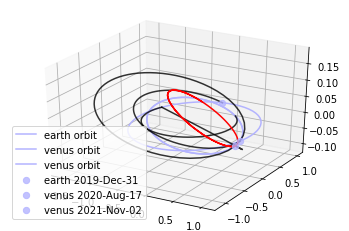

In [12]:
# Plot best result
solar_orbiter.plot(pop.champion_x)

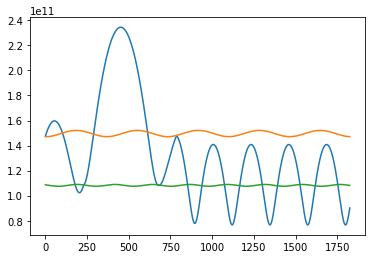

In [13]:
# Plot solar distance in AE
timeframe = range(1,5*365)
earth = jpl_lp("earth")
venus = jpl_lp("venus")

distances = []
edistances = []
vdistances = []

for i in timeframe:
    epoch = pop.champion_x[0]+i
    pos, vel = solar_orbiter.eph(pop.champion_x, epoch)
    epos, evel = earth.eph(epoch)
    vpos, vvel = venus.eph(epoch)
    distances.append(norm(pos))
    edistances.append(norm(epos))
    vdistances.append(norm(vpos))

fig, ax = plt.subplots()
ax.plot(list(timeframe), distances)
ax.plot(list(timeframe), edistances)
ax.plot(list(timeframe), vdistances)

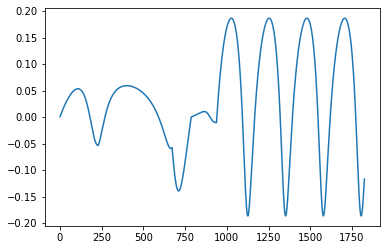

In [14]:
# Plot inclination
inclinations = []
for i in timeframe:
    epoch = pop.champion_x[0]+i
    pos, _ = solar_orbiter.eph(pop.champion_x, epoch)
    inclination = sign(pos[2])*acos(norm(pos[:2]) / norm(pos))
    inclinations.append(inclination)
    
fig2, ax2 = plt.subplots()
ax2.plot(list(timeframe), inclinations)